In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
import seaborn as sns

from keras.layers import Dense
from keras.layers import Dropout
from keras.models import Sequential
import keras
import keras.utils


import pandas as pd
import matplotlib.pyplot as plt


In [2]:
import warnings
warnings.simplefilter('ignore')

In [3]:

# read dataset using pandas
df = pd.read_csv("data.csv")
df = df.drop(['Unnamed: 32', 'id'], axis=1)

#encoding the the target feature
df['diagnosis']= df['diagnosis'].replace('M', 1)
df['diagnosis']= df['diagnosis'].replace('B', 0)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


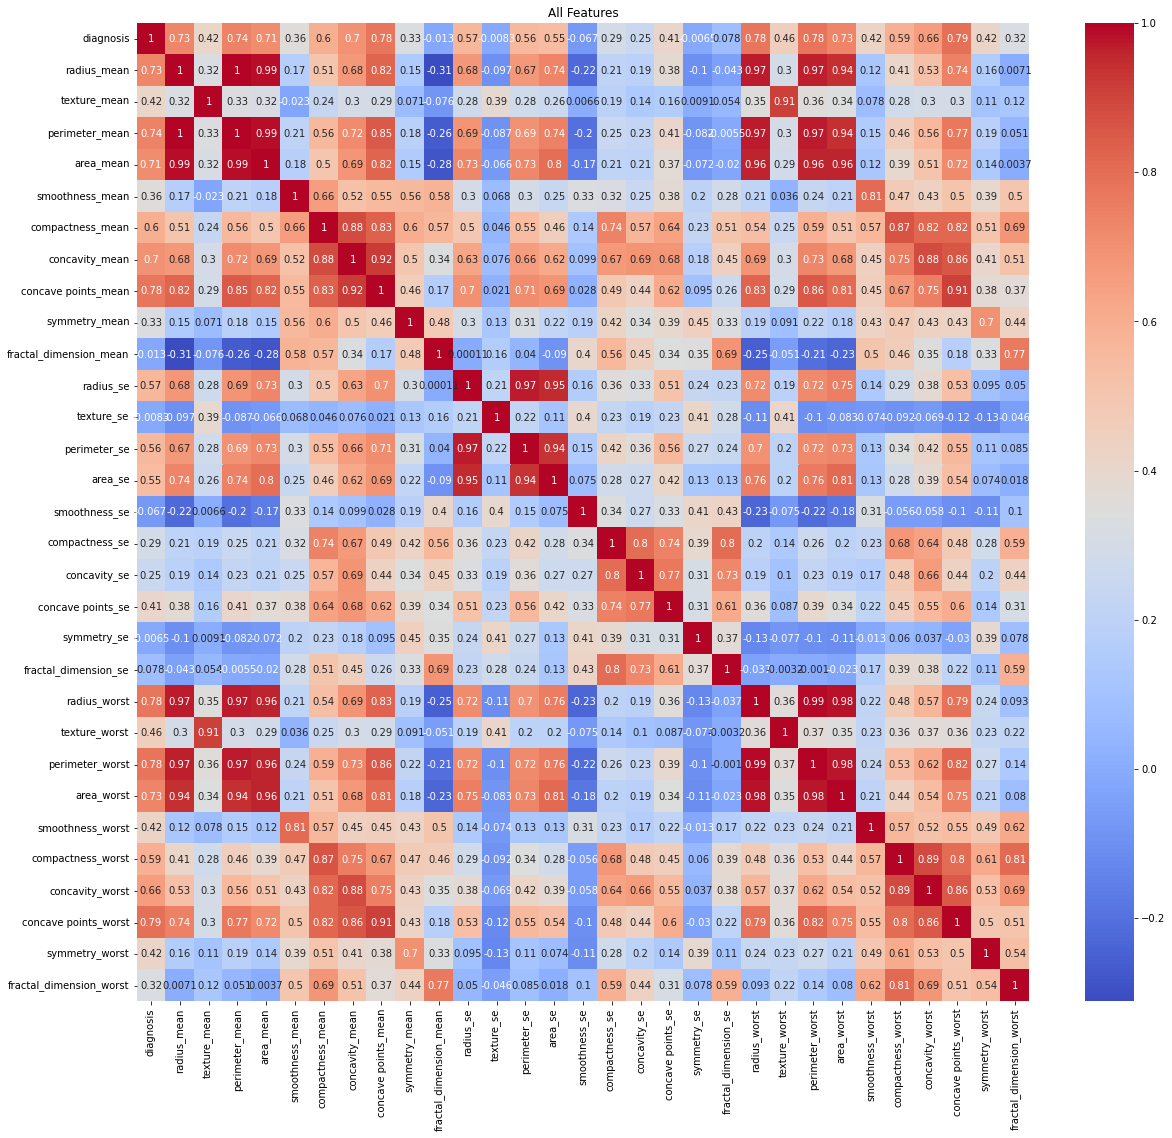

In [4]:
# create correlation on the dataset and plot the heatmap
corr = df.corr() 
plt.figure(figsize=(20,18))
sns.heatmap(corr, cmap='coolwarm', annot = True).set_title("All Features")
plt.show()


In [5]:
# display all features correlation value 
acc=df[df.columns[:]].corr()['diagnosis']
print('Correlation of All features: \n',acc)

Correlation of All features: 
 diagnosis                  1.000000
radius_mean                0.730029
texture_mean               0.415185
perimeter_mean             0.742636
area_mean                  0.708984
smoothness_mean            0.358560
compactness_mean           0.596534
concavity_mean             0.696360
concave points_mean        0.776614
symmetry_mean              0.330499
fractal_dimension_mean    -0.012838
radius_se                  0.567134
texture_se                -0.008303
perimeter_se               0.556141
area_se                    0.548236
smoothness_se             -0.067016
compactness_se             0.292999
concavity_se               0.253730
concave points_se          0.408042
symmetry_se               -0.006522
fractal_dimension_se       0.077972
radius_worst               0.776454
texture_worst              0.456903
perimeter_worst            0.782914
area_worst                 0.733825
smoothness_worst           0.421465
compactness_worst          0.5909

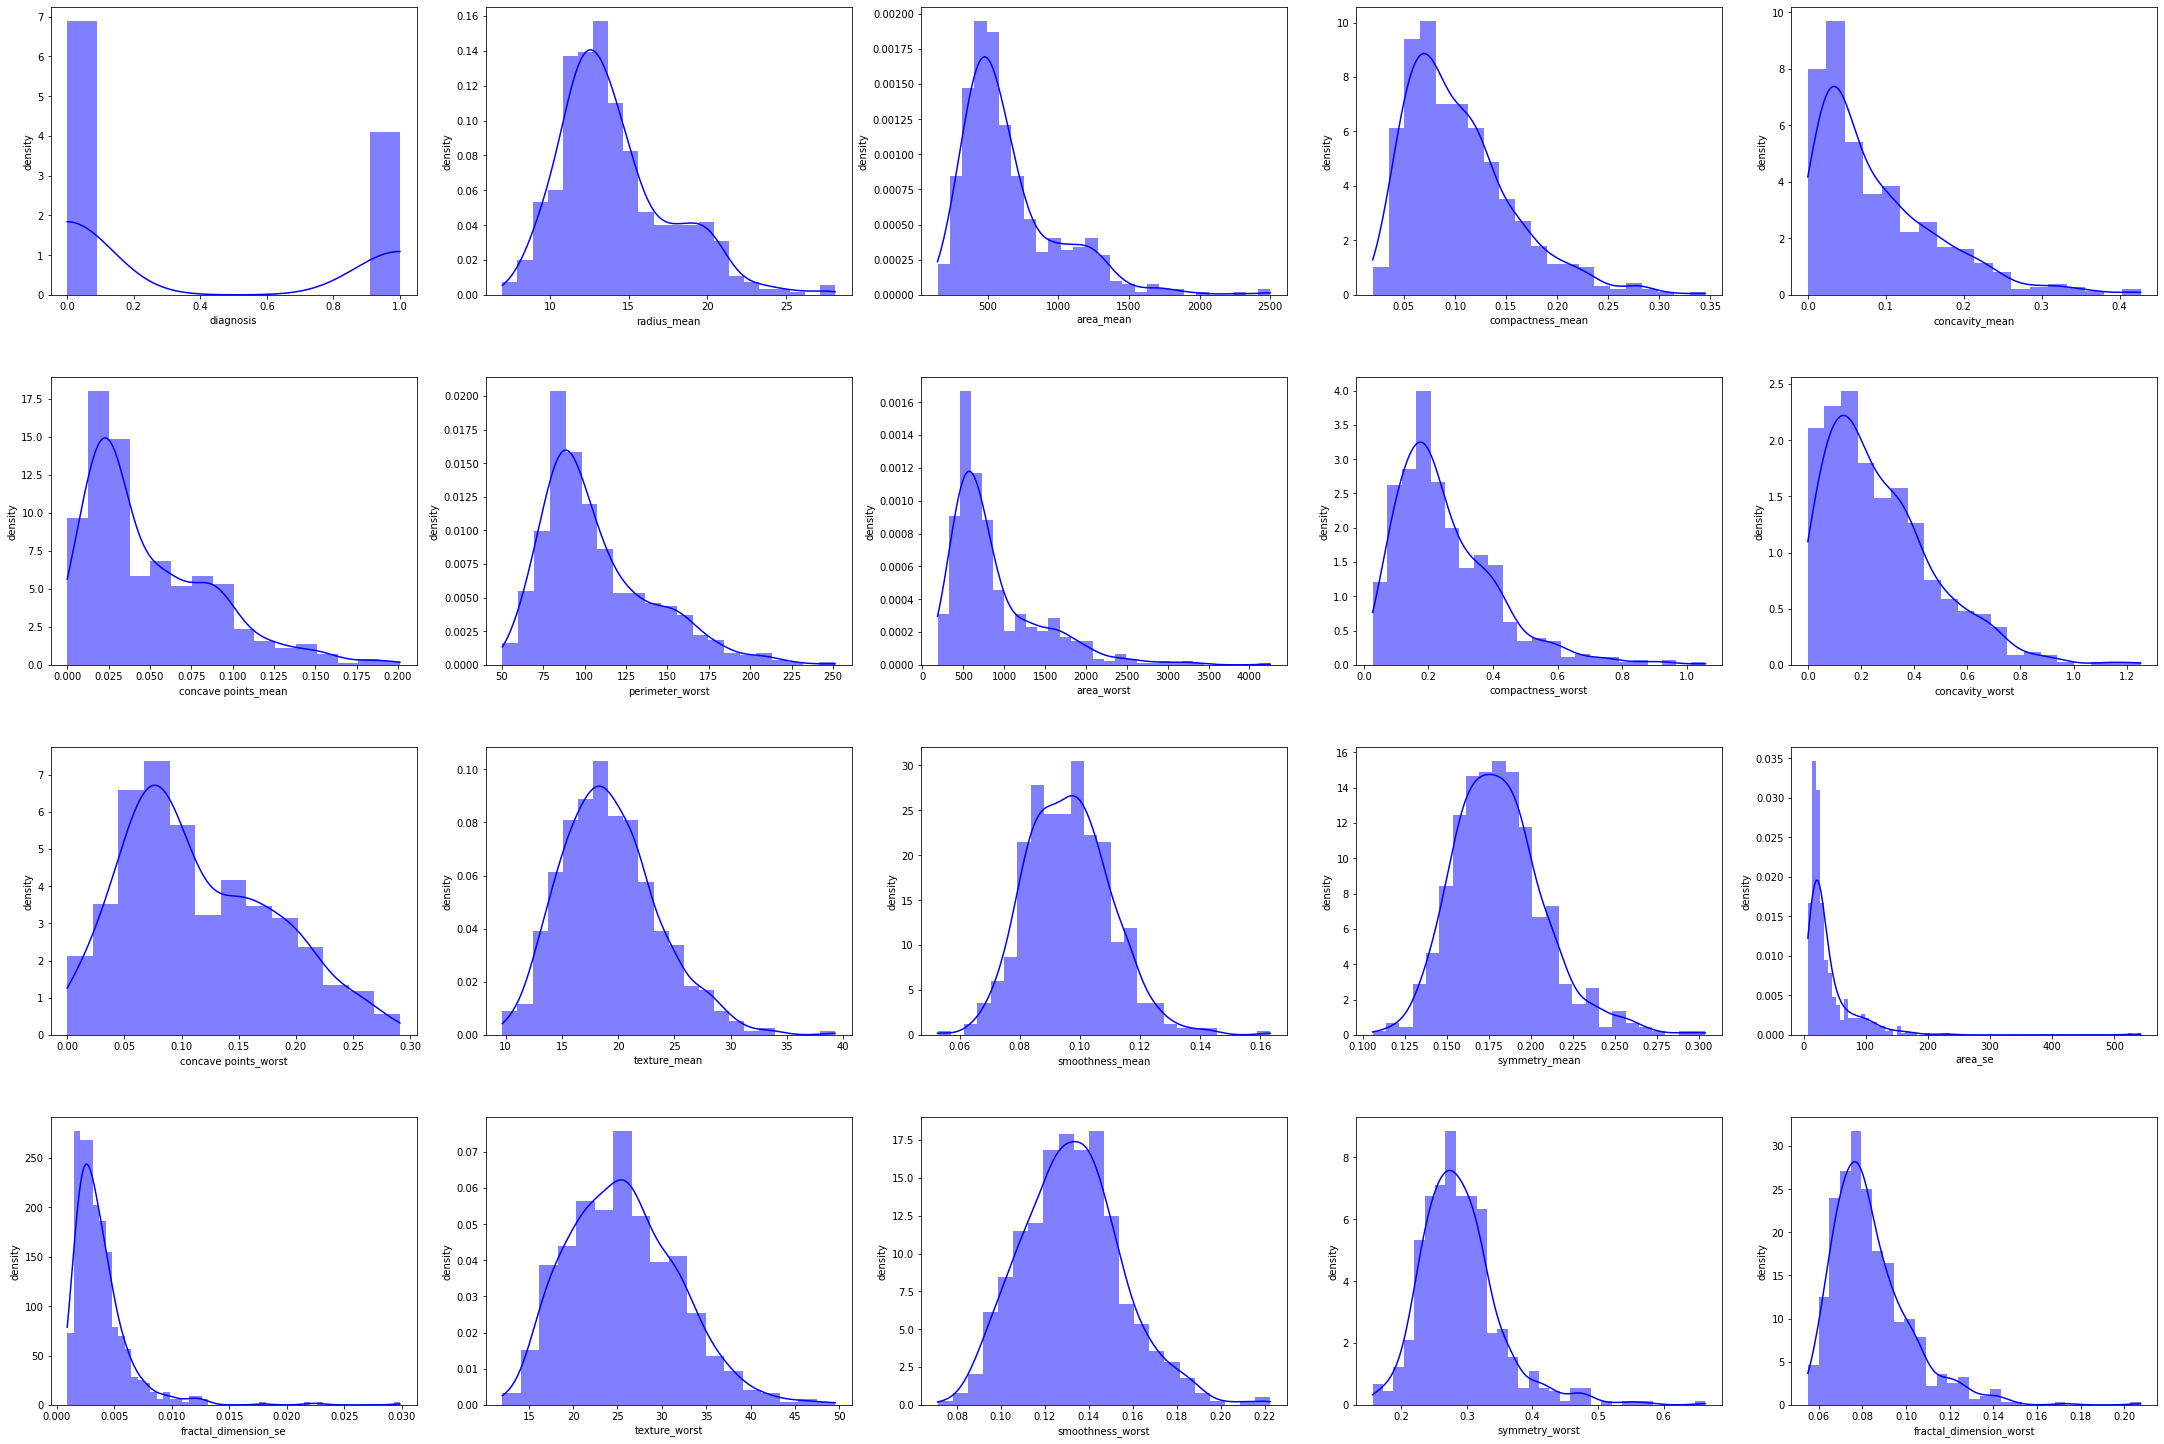

In [6]:
# generate skew diagram for related features
df_kde = df[['diagnosis', 'radius_mean', 'area_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'perimeter_worst', 'area_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst','texture_mean', 
         'smoothness_mean', 'symmetry_mean','area_se','fractal_dimension_se',
         'texture_worst', 'smoothness_worst', 'symmetry_worst',
       'fractal_dimension_worst']].copy()
# create hist and kde plots to observe the data distribution
fig, ax = plt.subplots(ncols=5, nrows=4, figsize=(30,20))
index = 0
ax = ax.flatten()
for col, value in df_kde.items():
    col_dist = sns.histplot(value, ax=ax[index], color="blue", label="100% Equities", kde=True, stat="density", linewidth=0)
    col_dist.set_xlabel(col)
    col_dist.set_ylabel('density')
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [7]:
# define a new dataframe from essential fatures
df_20 = df[[   'diagnosis', 'perimeter_worst', 'concave points_worst','texture_mean', 
            'smoothness_mean', 'symmetry_mean', 'texture_worst', 'smoothness_worst',
            'radius_mean', 'area_mean',
            'compactness_mean', 'concavity_mean', 'concave points_mean',
            'area_worst', 'compactness_worst',
            'concavity_worst', 'area_se','fractal_dimension_se',
            'symmetry_worst', 'fractal_dimension_worst'
         ]].copy()
df_20.head()

,diagnosis,perimeter_worst,concave points_worst,texture_mean,smoothness_mean,symmetry_mean,texture_worst,smoothness_worst,radius_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,area_worst,compactness_worst,concavity_worst,area_se,fractal_dimension_se,symmetry_worst,fractal_dimension_worst
0,1,184.60,0.2654,10.38,0.11840,0.2419,17.33,0.1622,17.99,1001.0,0.27760,0.3001,0.14710,2019.0,0.6656,0.7119,153.40,0.006193,0.4601,0.11890
1,1,158.80,0.1860,17.77,0.08474,0.1812,23.41,0.1238,20.57,1326.0,0.07864,0.0869,0.07017,1956.0,0.1866,0.2416,74.08,0.003532,0.2750,0.08902
2,1,152.50,0.2430,21.25,0.10960,0.2069,25.53,0.1444,19.69,1203.0,0.15990,0.1974,0.12790,1709.0,0.4245,0.4504,94.03,0.004571,0.3613,0.08758
3,1,98.87,0.2575,20.38,0.14250,0.2597,26.50,0.2098,11.42,386.1,0.28390,0.2414,0.10520,567.7,0.8663,0.6869,27.23,0.009208,0.6638,0.17300
4,1,152.20,0.1625,14.34,0.10030,0.1809,16.67,0.1374,20.29,1297.0,0.13280,0.1980,0.10430,1575.0,0.2050,0.4000,94.44,0.005115,0.2364,0.07678


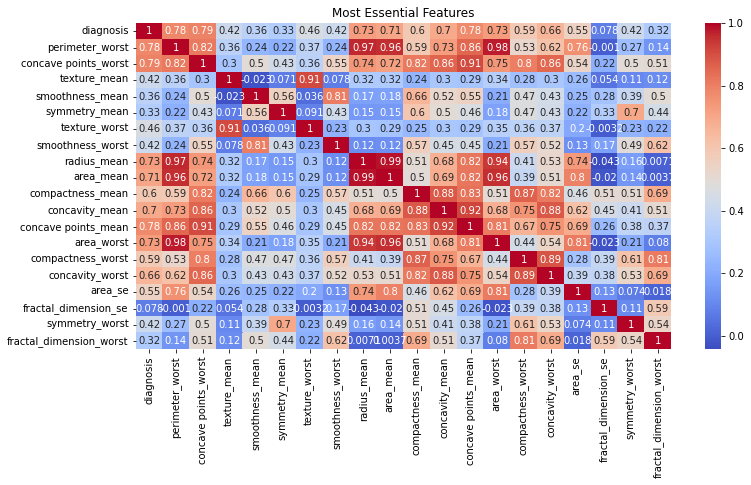

In [8]:
#plotting the corellation matrix
corr = df_20.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr, cmap='coolwarm', annot = True)
plt.title("Most Essential Features")
plt.show()

In [9]:
# Generate X as data and Y as label 
x = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

sc = StandardScaler()
x_std = sc.fit_transform(x)


#splitting the dataframe and keeping 80% of the data for training and rest 20% for testing
X_train, X_test, y_train, y_test = train_test_split(x_std, y, test_size=0.2, random_state=42, stratify = y)



#dividing the dataframe into training and target features
x_20 = df_20.drop(['diagnosis'], axis=1)
y_20 = df_20['diagnosis']
sc = StandardScaler()
x_std_20 = sc.fit_transform(x_20)
X_train20, X_test20, y_train20, y_test20 = train_test_split(x_std_20, y_20, test_size=0.2, random_state=42, stratify = y_20)



In [10]:
# Funtion to calculate scores for all classifiers
def find_scores(X_train, y_train):
    classifiers = []
    scores = []

    # Percepltron learning algorithm
    perceptron_classifier = Perceptron()
    perceptron_score = round(np.mean(cross_val_score(perceptron_classifier, X_train, y=y_train, scoring='f1_micro', cv=10))*100,2)
    scores.append(perceptron_score)
    classifiers.append(perceptron_classifier)

    # logistic regression
    log_reg_classifier = LogisticRegression()
    log_reg_score = round(np.mean(cross_val_score(log_reg_classifier, X_train, y=y_train, scoring='f1_micro', cv=10))*100,2)
    scores.append(log_reg_score)
    classifiers.append(log_reg_classifier)

    # SVM linear model
    svm_lin_classifier = SVC(kernel = 'linear', random_state = 0)
    svm_lin_score = round(np.mean(cross_val_score(svm_lin_classifier, X_train, y=y_train, scoring='f1_micro', cv=10))*100,2)
    scores.append(svm_lin_score)
    classifiers.append(svm_lin_classifier)

    # RBF svm model
    rbf_svm_classifier = SVC(kernel = 'rbf', random_state = 0)
    rbf_svm_score = round(np.mean(cross_val_score(rbf_svm_classifier, X_train, y=y_train, scoring='f1_micro', cv=10))*100,2)
    scores.append(rbf_svm_score)
    classifiers.append(rbf_svm_classifier)

    # Decision tree classifier
    dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    dt_score = round(np.mean(cross_val_score(dt_classifier, X_train, y=y_train, scoring='f1_micro', cv=10))*100,2)
    scores.append(dt_score)
    classifiers.append(dt_classifier)

    # Random Forest
    forest = RandomForestClassifier(criterion = 'entropy', random_state = 0)
    forest_score = round(np.mean(cross_val_score(forest, X_train, y=y_train, scoring='f1_micro', cv=10))*100,2)
    scores.append(forest_score)
    classifiers.append(forest)


    # NN
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=((X_train.shape[1]),)))
    model.add(Dropout(0.4))
    model.add(keras.layers.BatchNormalization())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.2))
    model.add(keras.layers.BatchNormalization())
    model.add(Dense(128, activation='relu'))
    model.add(keras.layers.BatchNormalization())
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy']) # ['binary_accuracy']
    history = model.fit(X_train, y_train, epochs=16, batch_size=32, verbose=1, validation_split=0.1)
    scores.append(round(history.history['val_accuracy'][-1]*100,2))
    classifiers.append(model)
    return scores, classifiers



scores, clfs = find_scores(X_train, y_train)
scores_20, clfs_20 = find_scores(X_train20, y_train20)

Epoch 1/16
13/13 [==============================] - 1s 26ms/step - loss: 0.3025 - accuracy: 0.8460 - val_loss: 0.2846 - val_accuracy: 0.9783
Epoch 2/16
13/13 [==============================] - 0s 5ms/step - loss: 0.0877 - accuracy: 0.9731 - val_loss: 0.2036 - val_accuracy: 1.0000
Epoch 3/16
13/13 [==============================] - 0s 4ms/step - loss: 0.0758 - accuracy: 0.9731 - val_loss: 0.1688 - val_accuracy: 1.0000
Epoch 4/16
13/13 [==============================] - 0s 4ms/step - loss: 0.0610 - accuracy: 0.9780 - val_loss: 0.1491 - val_accuracy: 1.0000
Epoch 5/16
13/13 [==============================] - 0s 4ms/step - loss: 0.0728 - accuracy: 0.9756 - val_loss: 0.1364 - val_accuracy: 1.0000
Epoch 6/16
13/13 [==============================] - 0s 4ms/step - loss: 0.1053 - accuracy: 0.9535 - val_loss: 0.1185 - val_accuracy: 0.9783
Epoch 7/16
13/13 [==============================] - 0s 4ms/step - loss: 0.0487 - accuracy: 0.9780 - val_loss: 0.1038 - val_accuracy: 0.9783
Epoch 8/16
13/13 [=

In [11]:
print(scores)
print(scores_20)

test_score = []
for clf in clfs[:-1]:
    clf.fit(X_train, y_train)
    pred = clf.predict( X_test)
    # test_score.append(clf.score)
    test_score.append(round(classification_report(y_test, pred, output_dict=True)["weighted avg"]["f1-score"]*100,2))

score_nn = clfs[-1].evaluate(X_test, y_test, batch_size=32) # 16 - 0.974286, 32 - 0.968571
test_score.append(round(score_nn[-1]*100,2))



test_score_20 = []
for clf in clfs_20[:-1]:
    clf.fit(X_train20, y_train20)
    pred = clf.predict( X_test20)
    test_score_20.append(round(classification_report(y_test20, pred, output_dict=True)["weighted avg"]["f1-score"]*100,2))

score_nn20 = clfs_20[-1].evaluate(X_test20, y_test20, batch_size=32) 
test_score_20.append(round(score_nn20[-1]*100,2))


[96.92, 97.37, 96.47, 97.14, 93.59, 96.25, 95.65]
[95.59, 97.14, 96.7, 96.91, 92.72, 96.03, 93.48]
4/4 [==============================] - 0s 2ms/step - loss: 0.0731 - accuracy: 0.9825


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               15872     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                        

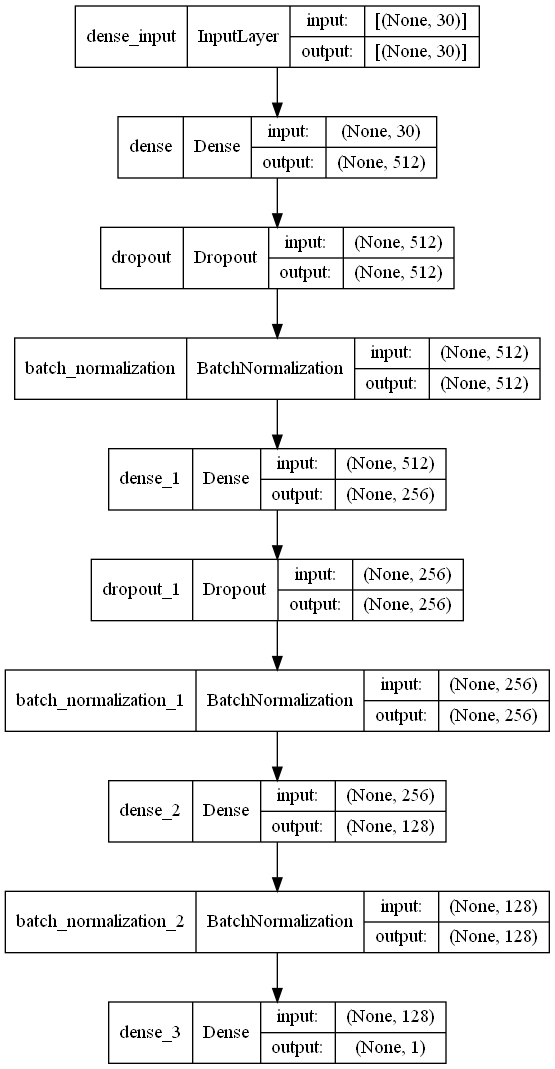

In [12]:
# display NN model summary
clfs[-1].summary()
from keras.utils.vis_utils import plot_model
# generate a NN model visualization
plot_model(clfs[-1], to_file='model_plot.png', show_shapes=True, show_layer_names=True)

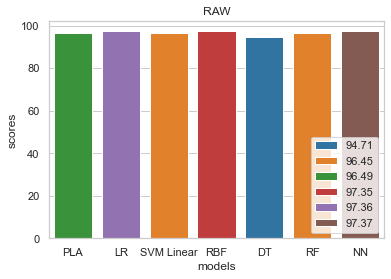

In [13]:
# create Bar chart for results of all features 
models = ["PLA", "LR", "SVM Linear", "RBF", "DT", "RF", "NN"]
sns.set_theme(style="whitegrid")
df = pd.DataFrame({'models': models, 'scores': test_score})
ax = sns.barplot(x="models", y="scores", data=df,hue="scores", dodge=False, palette="tab10").set_title("RAW")

plt.legend(loc="lower right")


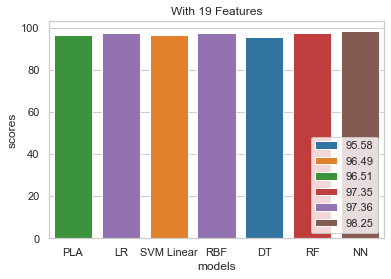

In [14]:
# create Bar chart for results of 19 features 
sns.set_theme(style="whitegrid")
df = pd.DataFrame({'models': models, 'scores': test_score_20})
ax = sns.barplot(x="models", y="scores", data=df,hue="scores", dodge=False, palette="tab10").set_title("With 19 Features")

plt.legend(loc="lower right")

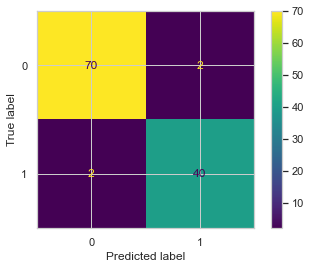

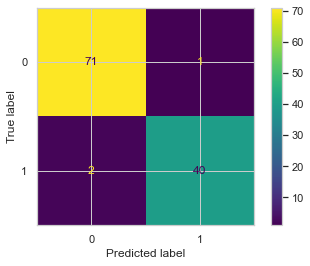

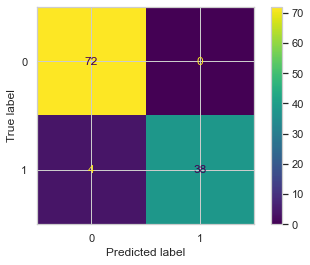

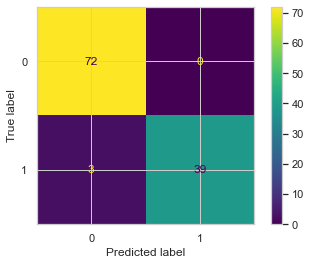

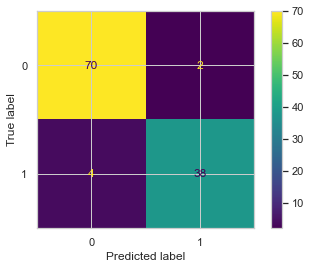

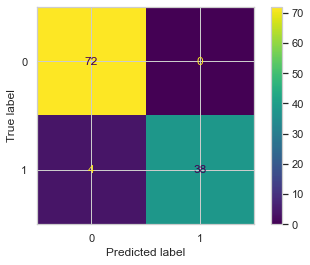

In [15]:
# function to display confusion matrix 
def display_cm(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(cm).plot()
    return cm_display
# iterate over binary classifiers to get confusion matrix
for i in range(len(clfs)-1):
    clfs[i].fit(X_train, y_train)
    clfs[i].score(x, y)
    y_pred = clfs[i].predict(X_test)
    cm = display_cm(y_test, y_pred)